<a href="https://colab.research.google.com/github/udlbook/udlbook/blob/main/Notebooks/Chap02/2_1_Supervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook 2.1 Supervised Learning

The purpose of this notebook is to explore the linear regression model discussed in Chapter 2 of the book.

Work through the cells below, running each cell in turn. In various places you will see the words "TO DO". Follow the instructions at these places and write code to complete the functions. There are also questions interspersed in the text.

Contact me at udlbookmail@gmail.com if you find any mistakes or have any suggestions.

In [1]:
# Math library
# import numpy as np
# Plotting library
# import matplotlib.pyplot as plt

# import a bunch of mojo things to help with math computation

from benchmark import Unit, run
from math import iota
from math import ceil
from python import Python
from python.object import PythonObject
from runtime.llcl import num_cores
from algorithm import parallelize, vectorize, vectorize_unroll
from tensor import Tensor, TensorShape
from utils.index import Index

In [2]:
%%python
from importlib.util import find_spec
import shutil
import subprocess

fix = """
-------------------------------------------------------------------------
fix following the steps here:
    https://github.com/modularml/mojo/issues/1085#issuecomment-1771403719
-------------------------------------------------------------------------
"""

def install_if_missing(name: str):
    if find_spec(name):
        return

    print(f"{name} not found, installing...")
    try:
        if shutil.which('python3'): python = "python3"
        elif shutil.which('python'): python = "python"
        else: raise ("python not on path" + fix)
        subprocess.check_call([python, "-m", "pip", "install", name])
    except:
        raise ImportError(f"{name} not found" + fix)

install_if_missing("numpy")
install_if_missing("matplotlib")

In [39]:
let x = Tensor[DType.float64](TensorShape(12), 0.03, 0.19, 0.34, 0.46, 0.78, 0.81, 1.08, 1.18, 1.39, 1.60, 1.65, 1.90)
let y = Tensor[DType.float64](TensorShape(12), 0.67, 0.85, 1.05, 1.0, 1.40, 1.5, 1.3, 1.54, 1.55, 1.68, 1.73, 1.6 )

print(x)
print(y)

Tensor([[0.029999999999999999, 0.19, 0.34000000000000002, ..., 1.6000000000000001, 1.6499999999999999, 1.8999999999999999]], dtype=float64, shape=12)
Tensor([[0.67000000000000004, 0.84999999999999998, 1.05, ..., 1.6799999999999999, 1.73, 1.6000000000000001]], dtype=float64, shape=12)


In [4]:
# Define 1D linear regression model
def f[T: DType](x: Tensor[T], phi0: SIMD[T,1], phi1: SIMD[T,1]) -> Tensor[T]:
  # TODO :  Replace this line with the linear regression model (eq 2.4)
  return phi0 + (x * phi1)

In [40]:
# helper function to convert Tensor to numpy
# very inefficient, is there a better way to do this?

def to_numpy[T: DType](x: Tensor[T]) -> PythonObject:
    let np = Python.import_module("numpy")
    let shape = x.shape()
    let np_shape = Python.evaluate("list()")
    var num_elems = 1
    let data = x.data()

    for index in range(shape.rank()):
        let len = shape[index]
        np_shape.append(len)
        num_elems = num_elems * shape[index]
        

    let numpy = np.zeros((num_elems))
    let reshaped = x.reshape(TensorShape(num_elems))

    for i in range(num_elems):
        numpy.itemset((i), reshaped[i])

    return numpy.reshape(np_shape)

In [43]:
fn linear_init[T: DType](start: SIMD[T,1] = 0, end: SIMD[T,1] = 1, step: SIMD[T,1] = 1) -> Tensor[T]:
    from math import ceil
    let length = ceil((end-start)/step).to_int()
    var t = Tensor[T](length)
    var v = start
    for i in range(length):
        t[i] = v
        v = v + step

    return t

In [48]:
# Function to help plot the data
def plot[T: DType](x: Tensor[T], y: Tensor[T], phi0: SIMD[T,1] , phi1: SIMD[T,1]):

    # import the required python modules
    let np = Python.import_module("numpy")
    let plt = Python.import_module("matplotlib.pyplot")
    let colors = Python.import_module("matplotlib.colors")

    fig_ax = plt.subplots()
    fig = fig_ax[0]
    ax = fig_ax[1]

    # convert the tensors to numpy
    xnp = to_numpy(x)
    ynp = to_numpy(y)

    ax.scatter(xnp,ynp)
    plt.xlim([0,2.0])
    plt.ylim([0,2.0])
    ax.set_xlabel('Input, ')
    ax.set_ylabel('Output, ')

    # Draw line
    x_line = linear_init[T](0,2,0.01)
    y_line = f(x_line, phi0, phi1)
    xl = to_numpy(x_line)
    yl = to_numpy(y_line)
    plt.plot(xl, yl,'b-')

    plt.show()
     

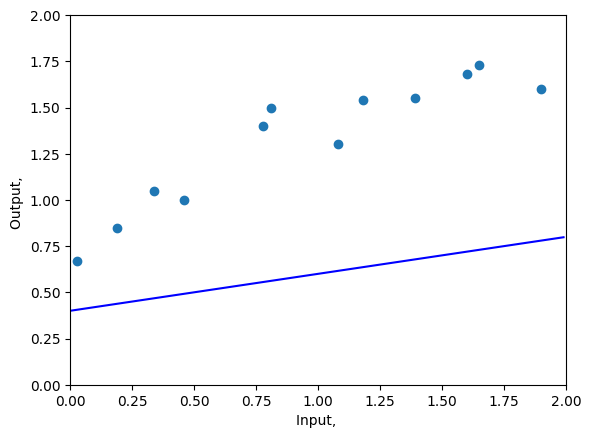

In [49]:
# Set the intercept and slope as in figure 2.2b
phi0 = 0.4 ; phi1 = 0.2
# Plot the data and the model
plot(x,y,phi0,phi1)

In [132]:
from math import pow

# Function to calculate the loss
def compute_loss[T: DType](x: Tensor[T], y: Tensor[T], phi0: SIMD[T, 1], phi1: SIMD[T,1]) -> SIMD[T,1]:
    # TODO Replace this line with the loss calculation (equation 2.5)

    var y_computed = (f(x, phi0, phi1) - y)
    y_computed.reshape(TensorShape(x.num_elements()))
    y_computed = y_computed * y_computed
    var loss: SIMD[T,1] = 0.0
    for i in range(y.num_elements()):
        loss = loss + y_computed[i]
    return loss

In [111]:
# Compute the loss for our current model
loss = compute_loss(x,y,phi0,phi1)
print("Ground Truth =7.07, Your Loss =")
print(loss)

Ground Truth =7.07, Your Loss =
0.20933983999999986


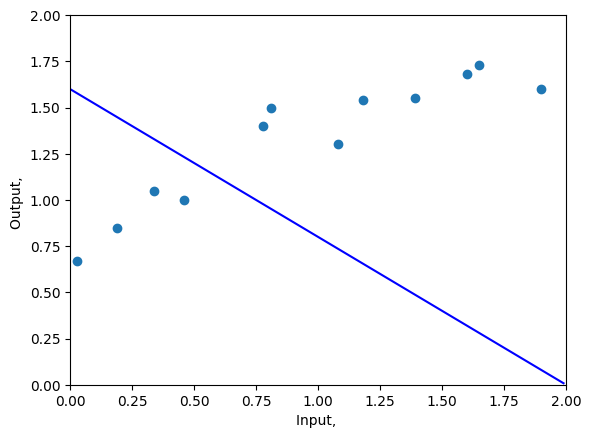


Ground truth =10.28 Your Loss
10.279524


In [112]:
# Set the intercept and slope as in figure 2.2c
phi0 = 1.60 ; phi1 =-0.8
# Plot the data and the model
plot(x,y,phi0,phi1)
loss = compute_loss(x,y,phi0,phi1)
print('Ground truth =10.28 Your Loss')
print(loss)

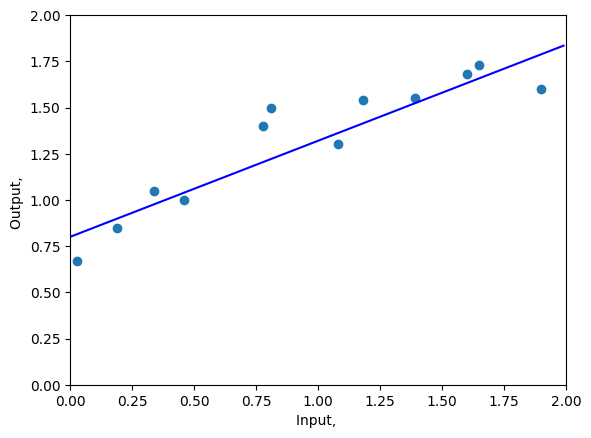


Your Loss
0.20933983999999986


In [113]:
# TO DO -- Change the parameters manually to fit the model
# First fix phi1 and try changing phi0 until you can't make the loss go down any more
# Then fix phi0 and try changing phi1 until you can't make the loss go down any more
# Repeat this process until you find a set of parameters that fit the model as in figure 2.2d
# You can either do this by hand, or if you want to get fancy, write code to descent automatically in this way
# Start at these values:
phi0 = 0.80 ; phi1 =0.52

plot(x,y,phi0,phi1)
loss = compute_loss(x,y,phi0,phi1)
print('Your Loss')
print(loss)

# Visualizing the loss function

The above process is equivalent to to descending coordinate wise on the loss function<br>

Now let's plot that function

In [141]:
# Make a 2D grid of possible phi0 and phi1 values
#phi0_mesh, phi1_mesh = np.meshgrid(np.arange(0.0,2.0,0.02), np.arange(-1.0,1.0,0.02))

phi0_range = linear_init[DType.float64](0, 2.0, 0.02)
phi1_range = linear_init[DType.float64](-1, 1.0, 0.02)

var loss_mesh = Tensor[DType.float64](TensorShape(phi1_range.num_elements(), phi0_range.num_elements()))

var min_loss: SIMD[DType.float64, 1] = 100000.0
var min_phi0: SIMD[DType.float64, 1] = 100000.0
var min_phi1: SIMD[DType.float64, 1] = 100000.0

for i in range(phi0_range.num_elements()):
    for j in range(phi1_range.num_elements()):
        the_loss = compute_loss(x, y, phi0_range[i], phi1_range[j])
        loss_mesh[Index(i,j)] = the_loss
        if loss < min_loss:
            min_loss = the_loss
            min_phi0 = phi0_range[i]
            min_phi1 = phi1_range[j]
        


# Make a 2D array for the losses
#all_losses = np.zeros_like(phi1_mesh)
# Run through each 2D combination of phi0, phi1 and compute loss
#for indices,temp in np.ndenumerate(phi1_mesh):
#    all_losses[indices] = compute_loss(x,y, phi0_mesh[indices], phi1_mesh[indices])


In [142]:
# Plot the loss function as a heatmap
def heatmap[T: DType](phi0: Tensor[T], phi1: Tensor[T], losses: Tensor[T], p0: SIMD[T,1], p1: SIMD[T,1], min_p0: SIMD[T,1], min_p1: SIMD[T,1]):
    # import the required python modules
    let np = Python.import_module("numpy")
    let plt = Python.import_module("matplotlib.pyplot")
    let colors = Python.import_module("matplotlib.colors")

    fig_ax = plt.subplots()
    fig = fig_ax[0]
    ax = fig_ax[1]

    fig.set_size_inches(7,7)
    levels = 256

    phi0_mesh = to_numpy(phi0)
    phi1_mesh = to_numpy(phi1)
    all_losses = to_numpy(losses)
    
    ax.contourf(phi0_mesh, phi1_mesh, all_losses ,levels)
    levels = 40
    ax.contour(phi0_mesh, phi1_mesh, all_losses ,levels)
    ax.set_ylim([1,-1])
    ax.set_xlabel('Intercept, phi_0')
    ax.set_ylabel('Slope, phi_1')

    # Plot the position of your best fitting line on the loss function
    # It should be close to the minimum
    ax.plot(p0,p1,'ro')
    ax.plot(min_p0,min_p1,'ro')
    plt.show()

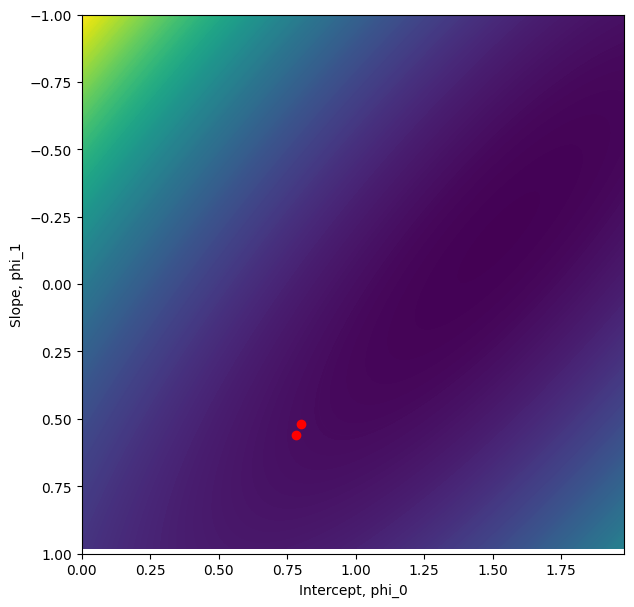


0.2070145599999999


In [144]:
heatmap(phi0_range, phi1_range, loss_mesh, phi0, phi1, min_phi0, min_phi1)
print(min_loss)